In [1]:
import glob
import os
import sys
import pickle
import subprocess

In [2]:
dataset = 'tacred'
model = 'roberta-base'
model_str = model.split('-')
suffix = model_str[0][0] + model_str[1][0]

output_dir = f"outputs/{suffix}_{dataset}/"
data_dir = f"data/{dataset}/"

print(f"data dir:\t {data_dir}")
print(f"output dir:\t {output_dir}")

data dir:	 data/tacred/
output dir:	 outputs/rb_tacred/


In [3]:
# # all checkpoint folders in the target directory
# checkpoint_dirs = sorted(glob.glob(f"{output_dir}*/checkpoint-*"))

# # Build the command
# cmd = [
#     "python", "src/tsne.py",
#     "--checkpoints"
# ] + checkpoint_dirs + [
#     "--data_file", f"{data_dir}/test_cf.json",
#     "--device", "cuda"
# ]

# # Print for verification
# print("Running command:", " ".join(cmd))

# # Run the command and capture output
# subprocess.run(cmd, check=True, stdout=sys.stdout, stderr=sys.stderr)

In [14]:
import pickle
import glob

# List all .pkl files in the directory
pkl_files = glob.glob("outputs/lb_refind/-1/metrics/*.pkl")
print("Found files:", pkl_files)

# Load and print the contents of each file
for pkl_file in pkl_files:
    with open(pkl_file, "rb") as f:
        data = pickle.load(f)
    print(f"\nContents of {pkl_file}:")
    print(data)

Found files: ['outputs/lb_refind/-1/metrics/refind_lb_refind_test_cf_dataset-entropy_N1000_L512_B32.pkl', 'outputs/lb_refind/-1/metrics/refind_lb_refind_test_dataset-entropy_N1000_L512_B32.pkl', 'outputs/lb_refind/-1/metrics/refind_lb_refind_test_prompt-entropy_N1000_L512_B32.pkl', 'outputs/lb_refind/-1/metrics/refind_lb_refind_test_cf_prompt-entropy_N1000_L512_B32.pkl', 'outputs/lb_refind/-1/metrics/refind_lb_refind_test_curvature_N1000_L512_B32.pkl', 'outputs/lb_refind/-1/metrics/refind_lb_refind_test_cf_curvature_N1000_L512_B32.pkl']

Contents of outputs/lb_refind/-1/metrics/refind_lb_refind_test_cf_dataset-entropy_N1000_L512_B32.pkl:
{'maxEntropy': [0.8041861266183127, 0.7889666738454143, 0.7580060555218902, 0.7382228132706447, 0.727541798353765, 0.7188881859798366, 0.693590794590693, 0.6523978602378342, 0.6033767575660787, 0.542246827678393, 0.490193084938273, 0.4575903455766217, 0.9144686585599605], 'logN': [0.7734558211439435, 0.7588179482036029, 0.7290404257173051, 0.7100131590

/tmp/ipykernel_183963/1990961802.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


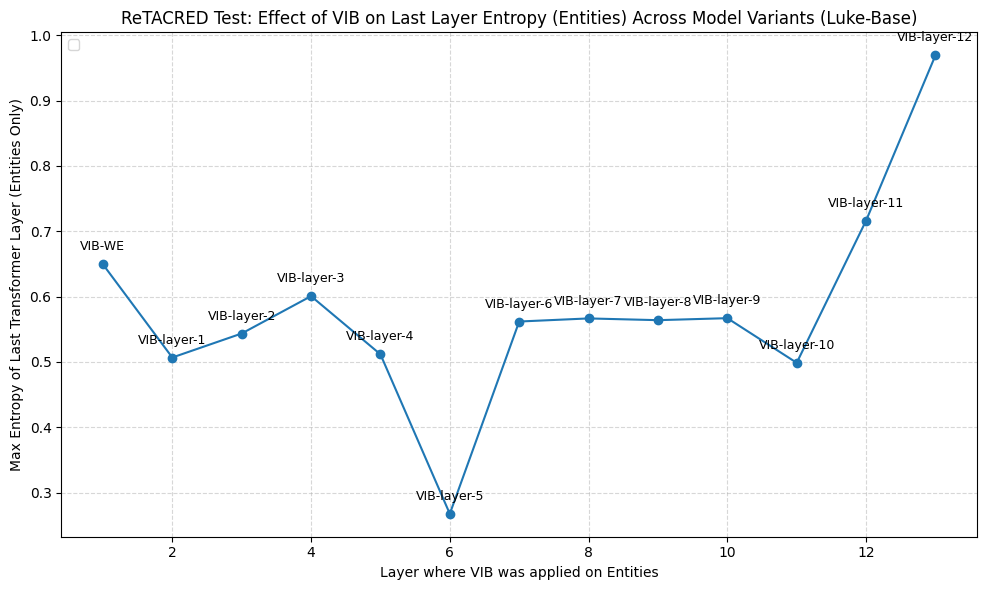

In [24]:
import glob
import pickle
import matplotlib.pyplot as plt
import re

# Mapping for x axis and legend
value_to_x = {-3: 0, -2: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, -1: 13}
legend_labels = {
    -3: "No VIB",
    -2: "VIB-WE",
    0: "VIB-layer-1",
    1: "VIB-layer-2",
    2: "VIB-layer-3",
    3: "VIB-layer-4",
    4: "VIB-layer-5",
    5: "VIB-layer-6",
    6: "VIB-layer-7",
    7: "VIB-layer-8",
    8: "VIB-layer-9",
    9: "VIB-layer-10",
    10: "VIB-layer-11",
    -1: "VIB-layer-12"
}

def extract_value(path):
    match = re.search(r"outputs/rb_tacred/(-?\d+)/metrics", path)
    if match:
        return int(match.group(1))
    return None

def custom_sort(path):
    value = extract_value(path)
    if value == -1:
        return 999  # Place -1 at the end
    return value

pkl_files = glob.glob("outputs/rb_tacred/*/metrics/*test_dataset-entropy*.pkl")
pkl_files_sorted = sorted(pkl_files, key=custom_sort)

x_vals = []
y_vals = []
labels = []
for pkl_file in pkl_files_sorted:
    value = extract_value(pkl_file)
    x = value_to_x.get(value)
    with open(pkl_file, "rb") as f:
        data = pickle.load(f)
    entropies = data.get('maxEntropy', None)
    if entropies is not None and len(entropies) > 0 and x is not None:
        x_vals.append(x)
        y_vals.append(entropies[-1])
        labels.append(legend_labels.get(value, str(value)))

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o', label="")
for i, (x, y, label) in enumerate(zip(x_vals, y_vals, labels)):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
plt.xlabel("Layer where VIB was applied on Entities")
plt.ylabel("Max Entropy of Last Transformer Layer (Entities Only)")
plt.title("ReTACRED Test: Effect of VIB on Last Layer Entropy (Entities) Across Model Variants (Luke-Base)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

/tmp/ipykernel_183963/1873913819.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


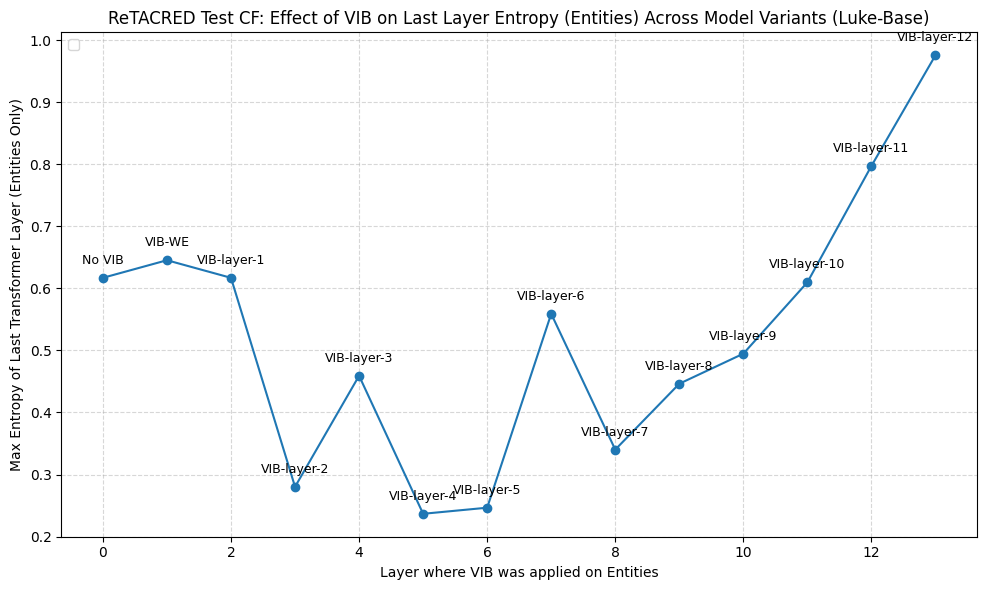

In [8]:
import glob
import pickle
import matplotlib.pyplot as plt
import re

# Mapping for x axis and legend
value_to_x = {-3: 0, -2: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, -1: 13}
legend_labels = {
    -3: "No VIB",
    -2: "VIB-WE",
    0: "VIB-layer-1",
    1: "VIB-layer-2",
    2: "VIB-layer-3",
    3: "VIB-layer-4",
    4: "VIB-layer-5",
    5: "VIB-layer-6",
    6: "VIB-layer-7",
    7: "VIB-layer-8",
    8: "VIB-layer-9",
    9: "VIB-layer-10",
    10: "VIB-layer-11",
    -1: "VIB-layer-12"
}

def extract_value(path):
    match = re.search(r"outputs/lb_tacred/(-?\d+)/metrics", path)
    if match:
        return int(match.group(1))
    return None

def custom_sort(path):
    value = extract_value(path)
    if value == -1:
        return 999  # Place -1 at the end
    return value

pkl_files = glob.glob("outputs/lb_tacred/*/metrics/*test_cf_dataset-entropy*.pkl")
pkl_files_sorted = sorted(pkl_files, key=custom_sort)

x_vals = []
y_vals = []
labels = []
for pkl_file in pkl_files_sorted:
    value = extract_value(pkl_file)
    x = value_to_x.get(value)
    with open(pkl_file, "rb") as f:
        data = pickle.load(f)
    entropies = data.get('maxEntropy', None)
    if entropies is not None and len(entropies) > 0 and x is not None:
        x_vals.append(x)
        y_vals.append(entropies[-1])
        labels.append(legend_labels.get(value, str(value)))

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o', label="")
for i, (x, y, label) in enumerate(zip(x_vals, y_vals, labels)):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
plt.xlabel("Layer where VIB was applied on Entities")
plt.ylabel("Max Entropy of Last Transformer Layer (Entities Only)")
plt.title("ReTACRED Test CF: Effect of VIB on Last Layer Entropy (Entities) Across Model Variants (Luke-Base)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()